In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import LabelEncoder, StandardScaler

import datetime as dt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("preprocessed.csv", parse_dates=True)

In [21]:
df.head()

,product,date,opening-cs,opening-pcs,received-cs,received-pcs,sales-cs,sales-pcs,foc-cs,foc-pcs,...,damage-cs,damage-pcs,closing-cs,closing-pcs,product_id,category,year,month,day,month_year
0,Kapaung ( Photo ),2022-05-01,0,0,0,0,0,0,0,0,...,0,0,0.0,0,1,1,2022,5,1,2022-05
1,Kapaung ( Non Photo ),2022-05-01,4,0,0,0,0,0,0,0,...,0,0,4.0,0,2,1,2022,5,1,2022-05
2,Kapaung ( Non Photo ) PKU,2022-05-01,28,0,0,0,0,0,0,0,...,0,0,28.0,0,3,1,2022,5,1,2022-05
3,Kapaung ( Can ),2022-05-01,8,0,0,0,0,0,0,0,...,0,0,8.0,0,4,1,2022,5,1,2022-05
4,Duya,2022-05-01,0,0,0,0,0,0,0,0,...,0,0,0.0,0,5,1,2022,5,1,2022-05


In [22]:
df.shape

(30763, 21)

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
#df = df[df['category'] == 1]

In [25]:
features = df.drop(['product','closing-cs','date','product_id','category','year','month','day'], axis=1)
target = df['closing-cs']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                  test_size = 0.05, 
                                                  random_state=22)



In [27]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: '2023-06'

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

ValueError: could not convert string to float: '2023-06'

In [13]:

Linear_test_prediction = linear_model.predict(X_test)

ValueError: could not convert string to float: '2023-10'

In [14]:
plt.scatter(y_test, Linear_test_prediction)
plt.title("Linear Regression Predictions")
plt.xlabel("Actual Value")
plt.ylabel("Predict Value")
plt.show()

NameError: name 'Linear_test_prediction' is not defined

In [15]:
#R2 error
linear_score = metrics.r2_score(y_test, Linear_test_prediction)

#mean absolute error
linear_MAE_score = metrics.mean_absolute_error(y_test, Linear_test_prediction)

#mean squared error
linear_MSE_score = metrics.mean_squared_error(y_test, Linear_test_prediction)

#root mean squared error 
linear_root_MSE_score = np.sqrt(linear_MSE_score)

print("Linear Model Evaluation")
print("R2 Score : ", linear_score)
print("Mean Absolute Error : ", linear_MAE_score)
print("Mean Squared Error : ", linear_MSE_score)
print("Root Mean Squared Error:", linear_root_MSE_score )

NameError: name 'Linear_test_prediction' is not defined

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

sc = StandardScaler()

svm_X_train = sc.fit_transform(X_train)
svm_X_test = sc.fit_transform(X_test)


SVR_Regression = SVR(kernel='linear').fit(svm_X_train,y_train)

In [69]:
SVR_score = SVR_Regression.score(svm_X_train,y_train)
print(SVR_score)


0.9999999866963166


In [72]:
#Prediction on training data
SVR_train_prediction = SVR_Regression.predict(svm_X_train)

#prediction on test data
SVR_test_prediction = SVR_Regression.predict(svm_X_test)

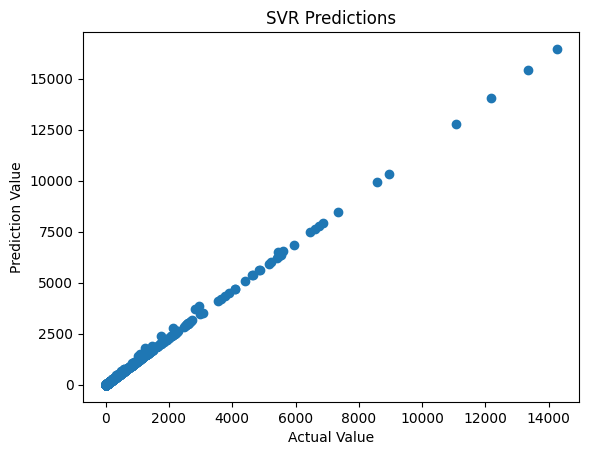

In [73]:
plt.scatter(y_test, SVR_test_prediction)
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.title("SVR Predictions")
plt.show()

In [74]:
#SVM Regression

#r2 Error
SVR_r2_score = metrics.r2_score(y_test, SVR_test_prediction)

#Mean Absolute Error
SVR_mean_absolute_error = metrics.mean_absolute_error(y_test, SVR_test_prediction)

#mean squared error
SVR_MSE_score = metrics.mean_squared_error(y_test, SVR_test_prediction)

#root mean squared error 
SVR_root_MSE_score = np.sqrt(SVR_MSE_score)


print("SVM Regression Model Evaluation")
print("R2 Score: ",SVR_r2_score)
print("SVR Mean Absolute Error:",SVR_mean_absolute_error)
print("SVR Squared Error:",SVR_MSE_score)
print("Root Mean Squared Error:", SVR_root_MSE_score )

SVM Regression Model Evaluation
R2 Score:  0.9715222199392559
SVR Mean Absolute Error: 63.93183189812657
SVR Squared Error: 31934.74657835996
Root Mean Squared Error: 178.70295626642542


In [75]:
from sklearn.tree import DecisionTreeRegressor 


DecisionTree_Regression = DecisionTreeRegressor(random_state=0)

#Fitting Model 
DecisionTree_Regression.fit(X_train, y_train)

#Prediction on training data
DT_train_prediction = DecisionTree_Regression.predict(X_train)


#Prediction on test data
DT_test_prediction = DecisionTree_Regression.predict(X_test)

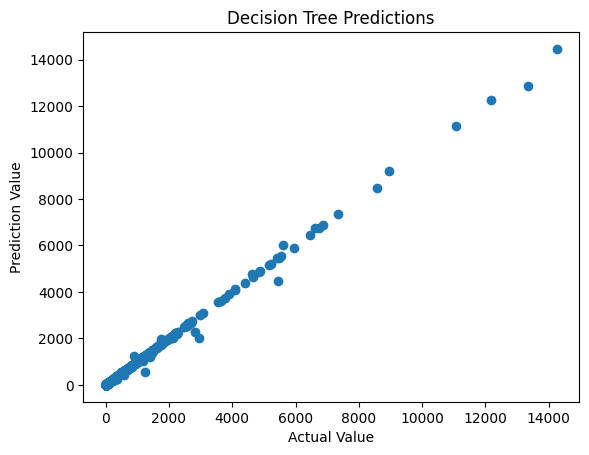

In [76]:
plt.scatter(y_test, DT_test_prediction)
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.title("Decision Tree Predictions")
plt.show()

In [77]:
score_random_tree = metrics.r2_score(y_test, DT_test_prediction)

#mean absolute error
MAE_score_random_tree = metrics.mean_absolute_error(y_test, DT_test_prediction)

#mean squared error
MSE_score_random_tree = metrics.mean_squared_error(y_test, DT_test_prediction)

#root mean squared error 
DT_root_MSE_score = np.sqrt(MSE_score_random_tree)


print("Random Tree Regression")
print("R2 Score:", score_random_tree)
print("Mean Absolute Error:", MAE_score_random_tree)
print("Mean Square Error:", MSE_score_random_tree)
print("Root Mean Squared Error:", DT_root_MSE_score )

Random Tree Regression
R2 Score: 0.9979186223617714
Mean Absolute Error: 6.257959714100065
Mean Square Error: 2334.0396361273556
Root Mean Squared Error: 48.31189952928114


In [78]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model = RandomForestRegressor(random_state=42)
RandomForest_model.fit(X_train, y_train)

#Prediction on training data
RF_train_prediction = RandomForest_model.predict(X_train)


#Prediction on test data
RF_test_prediction = RandomForest_model.predict(X_test)

In [79]:
score_random_forest = metrics.r2_score(y_test, DT_test_prediction)

#mean absolute error
MAE_score_random_forest = metrics.mean_absolute_error(y_test, DT_test_prediction)

#mean squared error
MSE_score_random_forest= metrics.mean_squared_error(y_test, DT_test_prediction)

#root mean squared error 
DT_root_MSE_score = np.sqrt(MSE_score_random_tree)


print("Random Forest Regression")
print("R2 Score:", score_random_tree)
print("Mean Absolute Error:", MAE_score_random_forest)
print("Mean Absolute Error:", MSE_score_random_forest)
print("Root Mean Squared Error:", DT_root_MSE_score )

Random Forest Regression
R2 Score: 0.9979186223617714
Mean Absolute Error: 6.257959714100065
Mean Absolute Error: 2334.0396361273556
Root Mean Squared Error: 48.31189952928114


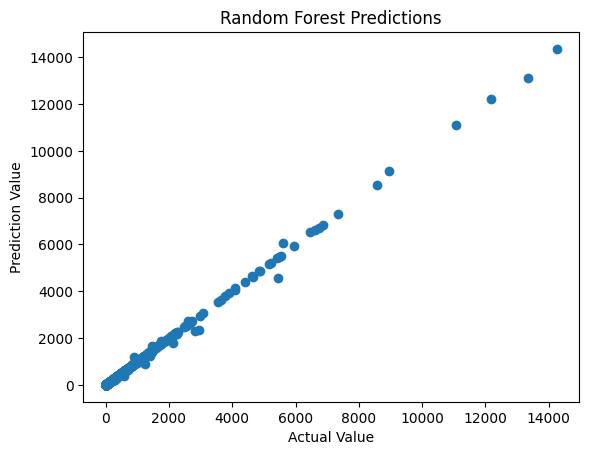

In [80]:
plt.scatter(y_test, RF_test_prediction)
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.title("Random Forest Predictions")
plt.show()

In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Knn Model with k = 5
KNN_Regression = KNeighborsClassifier(n_neighbors = 5)

# train the model
KNN_Regression.fit(X_train, y_train.astype('int'))

KNeighborsClassifier()

In [82]:
#Prediction on training data
KNN_data_prediction = KNN_Regression.predict(X_train)

#Prediction on testing data
KNN_test_prediction = KNN_Regression.predict(X_test)

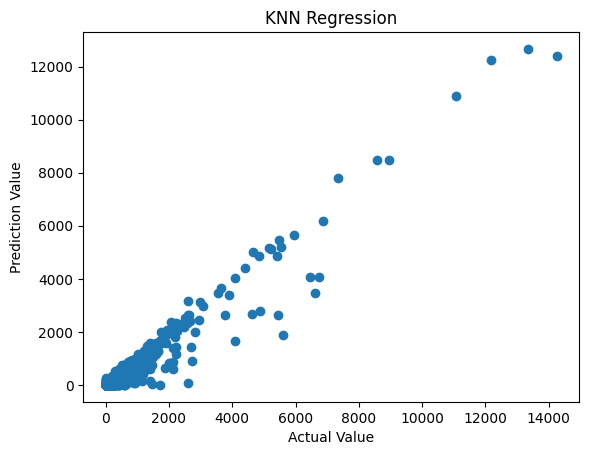

In [83]:
plt.scatter(y_test, KNN_test_prediction)
plt.title("KNN Regression")
plt.xlabel("Actual Value")
plt.ylabel("Prediction Value")
plt.show()

In [84]:
#KNN Regression

#R2 Error
r2_score_knn = metrics.r2_score(y_test, KNN_test_prediction)

#mean absolute error
KNN_mean_absolute_error = metrics.mean_absolute_error(y_test, KNN_test_prediction)

#mean squared error
KNN_MSE_score = metrics.mean_squared_error(y_test, KNN_test_prediction)

#root mean squared error 
KNN_root_MSE_score = np.sqrt(KNN_MSE_score)


print("KNN Model Evaluation")
print("R2 Score : ", r2_score_knn)
print("Mean Absolute Error: ", KNN_mean_absolute_error)
print("Mean Squared Error: ", KNN_MSE_score)
print("Root Mean Squared Error:", KNN_root_MSE_score )

KNN Model Evaluation
R2 Score :  0.9292000033436767
Mean Absolute Error:  92.59194282001299
Mean Squared Error:  79394.52956465237
Root Mean Squared Error: 281.7703489806058


In [86]:
features

,opening-cs,opening-pcs,received-cs,received-pcs,sales-cs,sales-pcs,foc-cs,foc-pcs,tso-cs,damage-cs,damage-pcs,closing-pcs,product_id,category,year,month,day
0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2022,5,1
1,4,0,0,0,0,0,0,0,0,0,0,0,2,1,2022,5,1
2,28,0,0,0,0,0,0,0,0,0,0,0,3,1,2022,5,1
3,8,0,0,0,0,0,0,0,0,0,0,0,4,1,2022,5,1
4,0,0,0,0,0,0,0,0,0,0,0,0,5,1,2022,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,5,0,0,0,0,0,0,0,0,0,0,0,74,5,2023,12,31
30759,5,0,0,0,0,0,0,0,0,0,0,0,84,5,2023,12,31
30760,17,0,0,0,0,0,0,0,0,0,0,0,91,0,2023,12,31
30761,3,0,0,0,0,0,0,0,0,0,0,0,92,0,2023,12,31


In [91]:
opening_cs = 147
opening_pcs = 0
received_cs = 0
received_pcs = 0
sales_cs = 0
sales_pcs = 0
foc_cs= 0
foc_pcs = 0
tso_cs = 0
damage_pcs = 0
damage_cs = 0
closing_pcs = 0

product_id =  40
year = 2023
month = 11
day = 24
category = 3


input_data = [[opening_cs, opening_pcs,received_cs, received_pcs, sales_cs, sales_pcs, foc_cs, foc_pcs,tso_cs, damage_cs, damage_pcs,closing_pcs,product_id ,category, year, month, day]] 

predicted_closing_cs = linear_model.predict(input_data)
predicted_closing_cs2 = KNN_Regression.predict(input_data)
predicted_closing_cs3 = RandomForest_model.predict(input_data)
predicted_closing_cs4 = DecisionTree_Regression.predict(input_data)
predicted_closing_cs5 = SVR_Regression.predict(input_data)

print(f'Predicted Linear Stock: {predicted_closing_cs[0]}')
print(f'Predicted KNN Stock: {predicted_closing_cs2[0]}')
print(f'Predicted RandomTree Stock: {predicted_closing_cs3[0]}')
print(f'Predicted DecisionTree Stock: {predicted_closing_cs4[0]}')
print(f'Predicted SVR Stock: {predicted_closing_cs5[0]}')

Predicted Linear Stock: 181745.40868289126
Predicted KNN Stock: 14324
Predicted RandomTree Stock: 13994.81
Predicted DecisionTree Stock: 13929.0
Predicted SVR Stock: 181758.06520713776


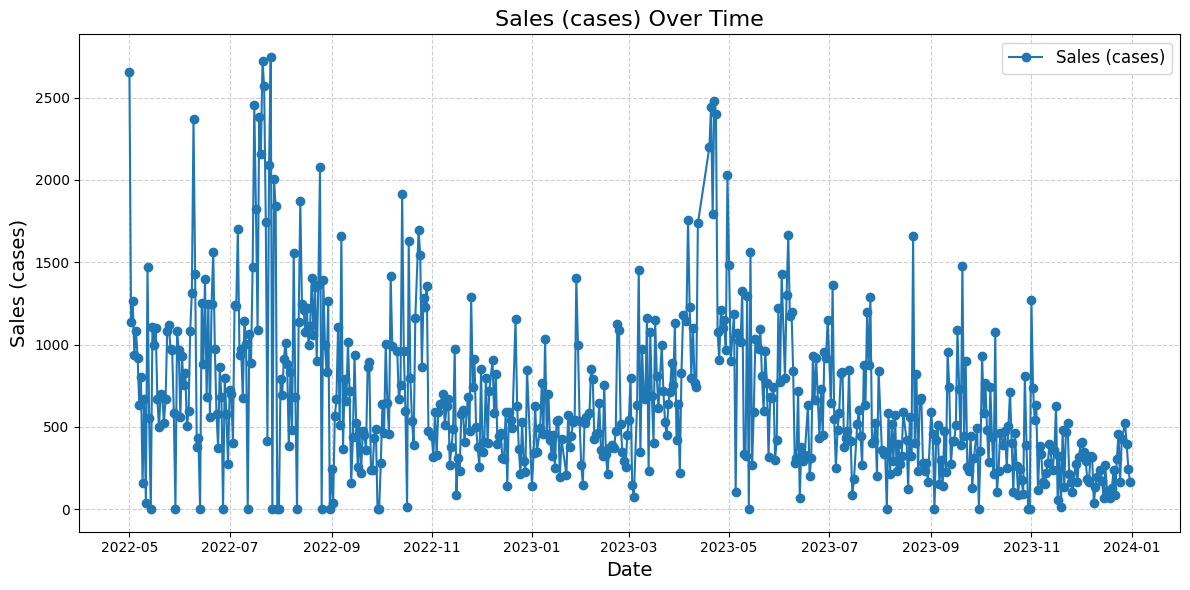

In [98]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format for proper plotting
df['date'] = pd.to_datetime(df['date'])

# Aggregate sales-cs by date if needed (e.g., summing across all products per date)
sales_data = df.groupby('date')['sales-cs'].sum().reset_index()

# Plot sales-cs vs. date
plt.figure(figsize=(12, 6))
plt.plot(sales_data['date'], sales_data['sales-cs'], marker='o', linestyle='-', label='Sales (cases)')

plt.title('Sales (cases) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales (cases)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

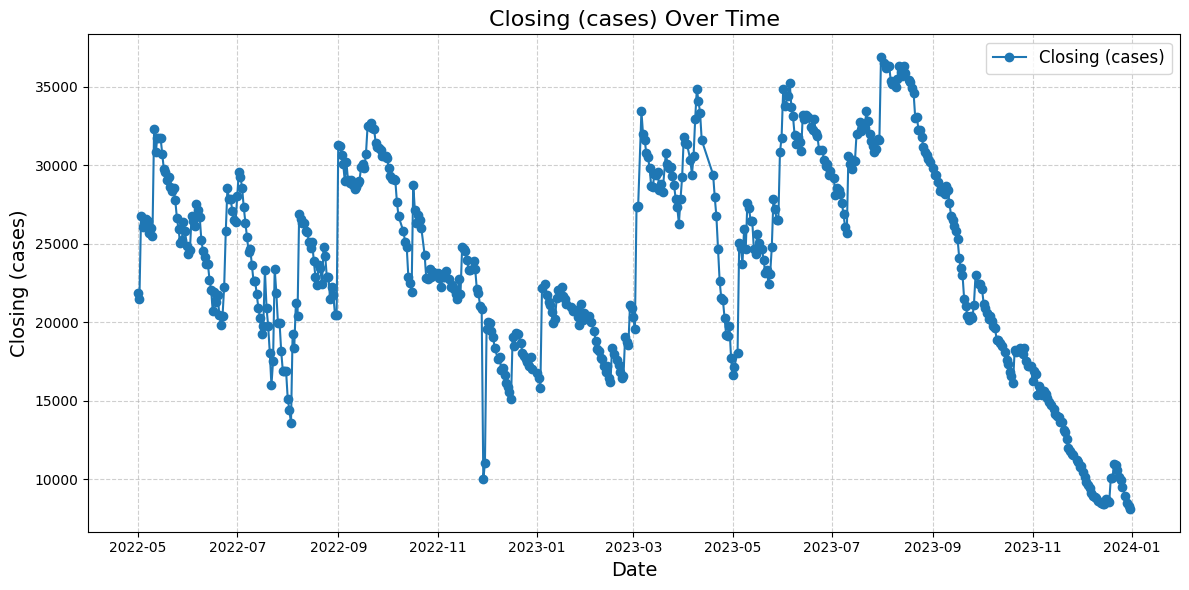

In [99]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format for proper plotting
df['date'] = pd.to_datetime(df['date'])

# Aggregate sales-cs by date if needed (e.g., summing across all products per date)
sales_data = df.groupby('date')['closing-cs'].sum().reset_index()

# Plot sales-cs vs. date
plt.figure(figsize=(12, 6))
plt.plot(sales_data['date'], sales_data['closing-cs'], marker='o', linestyle='-', label='Closing (cases)')

plt.title('Closing (cases) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing (cases)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()